# Multi-layer perceptron

In this demo, we will train and test a multi-layer perceptron model on the MNIST handwritten digits dataset.

### 1. Load dataset

To load the original MNIST dataset, we can use the [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml) method. Since this method will need to download the dataset and load it into memory, it will take a while.

Note that an MNIST image has shape 28 x 28. Here the images have already been flatten to a vector of size 784.

In [1]:
from sklearn.datasets import fetch_openml

X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.  # Scale the pixel values to be in [0, 1]

print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


### 2. Split dataset into train/test sets

Traditionally, we use 10,000 examples for the test set.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=10000, random_state=42)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### 3. Define and train an MLP classifier

We will define and train an MLP classifier with one hidden layer that contains 50 neurons and uses logistic activation. This classifier will be trained with SGD (Stochastic Gradient Descent) for 30 epochs. We also set 'verbose=True' to track the training progress.

In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    activation = 'logistic', 
                    max_iter=30, 
                    verbose=True)

mlp.fit(X_train, Y_train)

Iteration 1, loss = 1.06901373
Iteration 2, loss = 0.40456026
Iteration 3, loss = 0.30147064
Iteration 4, loss = 0.25638108
Iteration 5, loss = 0.22758336
Iteration 6, loss = 0.20606565
Iteration 7, loss = 0.18886531
Iteration 8, loss = 0.17453197
Iteration 9, loss = 0.16223669
Iteration 10, loss = 0.15164378
Iteration 11, loss = 0.14234528
Iteration 12, loss = 0.13399580
Iteration 13, loss = 0.12639574
Iteration 14, loss = 0.11971643
Iteration 15, loss = 0.11373738
Iteration 16, loss = 0.10790164
Iteration 17, loss = 0.10311953
Iteration 18, loss = 0.09844710
Iteration 19, loss = 0.09410739
Iteration 20, loss = 0.09009881
Iteration 21, loss = 0.08613008
Iteration 22, loss = 0.08264342
Iteration 23, loss = 0.07926996
Iteration 24, loss = 0.07626456
Iteration 25, loss = 0.07356102
Iteration 26, loss = 0.07072018
Iteration 27, loss = 0.06795416
Iteration 28, loss = 0.06560837
Iteration 29, loss = 0.06328811
Iteration 30, loss = 0.06117296


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=30,
              verbose=True)

### 4. Evaluate the trained MLP on the test set

In [4]:
from sklearn.metrics import accuracy_score

Y_pred = mlp.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.9653


# Visualizations

### 1. Show a training example and its label

We can reshape an example into a 28 x 28 matrix and plot it using matplotlib.

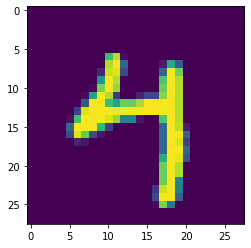

4


In [5]:
import matplotlib.pyplot as plt

img_id = 10
image = X_train[img_id].reshape((28, 28))
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label)

### 2. Show a test example and its predicted label

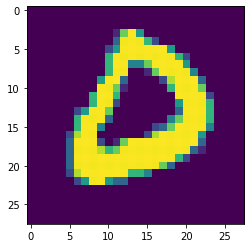

['0']


In [6]:
img_id = 5
image = X_test[img_id]

# Convert the image into 28 x 28 matrix to plot
plt.imshow(image.reshape((28, 28)))
plt.show()

# Convert the image vector into a matrix 1 x 784 before prediction
predicted_label = mlp.predict(image.reshape((1, 784)))
print(predicted_label)